In [16]:
import glob
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from pyproj import Proj
import xarray
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from datetime import timedelta, datetime
#import contextily as ctx
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

jet = cm.get_cmap('jet', 256)
newcolors = jet(np.linspace(0.2, 1.0, 256))  # skip darkest 20%
lighter_jet = ListedColormap(newcolors)

lakes = cf.NaturalEarthFeature(
    category='physical',
    name='lakes',
    scale='10m',  # options: '10m', '50m', '110m'
    facecolor='none'  # or 'none' if you just want outlines
)


/tmp/ipykernel_3244099/3686228177.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet', 256)


In [17]:
color_dict = {'lightblue': '#e9faff',
              'skyblue': '#8ce2ff',
              'ygreen': '#c3f448',
              'yellow': '#faff00',
              'yorange': '#ef0100',
              'maroon': '#690100'}

mycolorbar = LinearSegmentedColormap.from_list('mycolorbar', [
    color_dict['lightblue'],
    color_dict['skyblue'],
    color_dict['ygreen'],
    color_dict['yellow'],
    color_dict['yorange'],
])

In [18]:
dat = '20191003'
dat1 = '2019-10-03-03600'
dat2 = '2019-10-04-03600'
workdir = '/home/svisaga/MUSICA_ANALYSES/WWW-AIR_1726704979598/'
p3file = f'CAMP2Ex-mrg01-P3B-NC_merge_{dat}_R3.nc'
p3data_ds = xarray.open_dataset(workdir+p3file)
p3data_ds
variables = ['Org_Ave_IsoK_STP', 'mz42_Ave_IsoK_STP', 'mz43_Ave_IsoK_STP', 'mz44_Ave_IsoK_STP', 'mz60_Ave_IsoK_STP']
selected_data = p3data_ds[variables]
p3data = selected_data.to_dataframe().reset_index()

In [19]:
longitude_min = 94
longitude_max = 140
latitude_min = -11  # Adjust as necessary
latitude_max = 20   # Adjust as necessary

In [20]:
ds_MERRA2_wind = xarray.open_mfdataset("/ships22/raqms/svisaga/MERRA2_T_U_V_Q_2025/MERRA2_TUVQ_SEAcut_25km_2019-10-04-00000.nc")
ds_MERRA2_wind_mean = ds_MERRA2_wind

In [21]:
# Constants
P0 = 101325 #101325  # sea-level pressure in Pa
T0 = 288.15  # standard temperature in K
g = 9.80665  # gravity in m/s^2
R = 287.05   # specific gas constant for dry air in J/(kg·K)

# Convert pressure to Pa
pressure_pa = ds_MERRA2_wind_mean['lev'] * 100

# Compute altitude (meters)
altitude = (T0 / (g / R)) * np.log(P0 / pressure_pa)
altitude.values


array([47468.80148339, 41273.45496815, 35902.87128374, 31356.45341058,
       28167.04714476, 26612.48831877, 25099.97086403, 23629.44620058,
       22100.08568465, 20627.35709664, 19256.76458874, 17886.17081302,
       16515.57787547, 15144.98434463, 13774.39126038, 12403.79792213,
       11033.20411662,  9662.610254  ,  8292.01745596,  6921.42402195,
        5550.83039977,  4283.18850479,  3223.76478057,  2388.04131574,
        1776.01668816,  1387.69064155,  1122.20426998,   882.00306074,
         667.08549705,   477.45359621,   313.10562822,   174.0421484 ])

In [22]:
ds_MERRA2_wind_mean = ds_MERRA2_wind_mean.assign_coords(altitude=("lev", altitude.values))

In [23]:
ds_wind = xarray.open_mfdataset(f"/ships22/raqms/svisaga/MUSICAv0_p3/7km_complete/MUSICAv0_SEAcut_ne30x16_2019-10-04-03600_speciated.nc")
ds_wind_mean = ds_wind.isel(time=0)

In [24]:
# Constants
P0 = 101325 #101325  # sea-level pressure in Pa
T0 = 288.15  # standard temperature in K
g = 9.80665  # gravity in m/s^2
R = 287.05   # specific gas constant for dry air in J/(kg·K)

# Convert pressure to Pa
pressure_pa = ds_wind_mean['lev'] * 100

# Compute altitude (meters)
altitude = (T0 / (g / R)) * np.log(P0 / pressure_pa)

In [25]:
ds_wind_mean = ds_wind_mean.assign_coords(altitude=("lev", altitude.values))
ds_wind_mean

<xarray.Dataset>
Dimensions:   (lat: 241, lon: 225, lev: 32)
Coordinates:
  * lat       (lat) float32 7.0 7.062 7.125 7.188 ... 21.81 21.88 21.94 22.0
  * lon       (lon) float32 115.0 115.1 115.1 115.2 ... 128.8 128.9 128.9 129.0
  * lev       (lev) float32 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
    time      datetime64[ns] 2019-10-04T00:30:00
    altitude  (lev) float64 4.747e+04 4.127e+04 3.59e+04 ... 477.5 313.1 174.0
Data variables: (12/30)
    AODABS    (lat, lon) float32 dask.array<chunksize=(241, 225), meta=np.ndarray>
    AODBC     (lat, lon) float32 dask.array<chunksize=(241, 225), meta=np.ndarray>
    AODDUST   (lat, lon) float32 dask.array<chunksize=(241, 225), meta=np.ndarray>
    AODPOM    (lat, lon) float32 dask.array<chunksize=(241, 225), meta=np.ndarray>
    AODSO4    (lat, lon) float32 dask.array<chunksize=(241, 225), meta=np.ndarray>
    AODSOA    (lat, lon) float32 dask.array<chunksize=(241, 225), meta=np.ndarray>
    ...        ...
    RELHUM    (lat, lon, lev) float32 dask.array<chunksize=(241, 225, 32), meta=np.ndarray>
    T         (lat, lon, lev) float32 dask.array<chunksize=(241, 225, 32), meta=np.ndarray>
    U         (lat, lon, lev) float32 dask.array<chunksize=(241, 225, 32), meta=np.ndarray>
    V         (lat, lon, lev) float32 dask.array<chunksize=(241, 225, 32), meta=np.ndarray>
    ZBOT      (lat, lon) float32 dask.array<chunksize=(241, 225), meta=np.ndarray>
    Z3        (lat, lon, lev) float32 dask.array<chunksize=(241, 225, 32), meta=np.ndarray>

In [26]:
ds_zbot = xarray.open_mfdataset("/ships22/raqms/svisaga/MUSICAv0_p3_0.36BA_FINNpeatSM/7km_complete/MUSICAv0_PHIS_ne30x16_2019-09-11-03600.nc")
#ds_wind_ = ds_wind.isel(lev=31)
ds_zbot = ds_zbot.mean(dim="time")
ds_zbot

<xarray.Dataset>
Dimensions:  (lat: 241, lon: 225, lev: 32)
Coordinates:
  * lat      (lat) float32 7.0 7.062 7.125 7.188 7.25 ... 21.81 21.88 21.94 22.0
  * lon      (lon) float32 115.0 115.1 115.1 115.2 ... 128.8 128.9 128.9 129.0
  * lev      (lev) float32 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Data variables:
    PHIS     (lat, lon) float32 dask.array<chunksize=(241, 225), meta=np.ndarray>

/tmp/ipykernel_3244099/3920680111.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(lighter_jet).copy()
/tmp/ipykernel_3244099/3920680111.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(lighter_jet).copy()


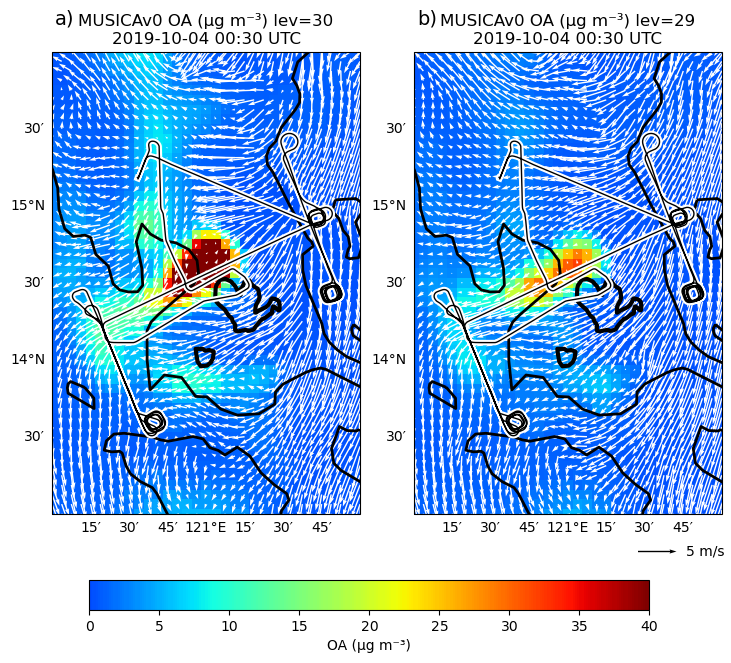

In [42]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cf
import pandas as pd
from matplotlib import cm

# Define levels you want to plot
levels = [30, 29]
# Panel label: 'a)' for first, 'b)' for second
panel_labels = ['a)', 'b)']


fig = plt.figure(figsize=(14, 6))  # wider for two panels
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=-0.5)

pla_proj = ccrs.PlateCarree()
axes = []

# Loop over lev values and plot each panel
for i, lev in enumerate(levels):
    ds_wind_ = ds_wind_mean.isel(lev=lev)
    alt_4d = ds_wind_['altitude'].broadcast_like(ds_wind_['U'])
    step = 1
    U_sub = ds_wind_['U'].isel(lat=slice(None, None, step), lon=slice(None, None, step))
    V_sub = ds_wind_['V'].isel(lat=slice(None, None, step), lon=slice(None, None, step))
    x_sub = ds_wind_['lon'].isel(lon=slice(None, None, step))
    y_sub = ds_wind_['lat'].isel(lat=slice(None, None, step))
    X, Y = np.meshgrid(x_sub, y_sub)

    ax = fig.add_subplot(gs[i], projection=pla_proj)
    axes.append(ax)

    ax.set_extent([120, 122, 13, 16], crs=ccrs.PlateCarree())

    # conversion factor
    p3_ug_m3 = 1.225 * 1000 * 1E6
    oa_model = p3_ug_m3 * (ds_wind_['pom_a1'] + ds_wind_['pom_a4'] +
                           ds_wind_['soa_a1'] + ds_wind_['soa_a2'])

    cmap = cm.get_cmap(lighter_jet).copy()
    cmap.set_bad(color='k')

    # Use panel_labels[i] instead of hard-coded 'a)'
    ax.text(0.01, 1.05, panel_labels[i], transform=ax.transAxes,
            fontsize=14, va='bottom', ha='left')
    # Plot OA field
    ref = oa_model.plot.pcolormesh(vmin=0, vmax=40, cmap=cmap,
                                   ax=ax, add_colorbar=False)
    q = ax.quiver(X, Y, U_sub, V_sub, transform=ccrs.PlateCarree(),
                    scale=40, width=0.0045, color='white', zorder=1)
    
    # Coastlines and borders
    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.add_feature(cf.BORDERS, linewidth=2, edgecolor='black', zorder=2)
    ax.add_feature(lakes, edgecolor='black', linewidth=3)
    # Flight track
    ax.plot(p3data['lon'], p3data['lat'], color='white', lw=4,
            transform=ccrs.PlateCarree(), label='Flight Track')
    ax.plot(p3data['lon'], p3data['lat'], color='k', lw=1,
            transform=ccrs.PlateCarree(), label='Flight Track')
    
    # Gridlines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.xlines = False
    gl.ylines = False
    gl.right_labels = False
    gl.top_labels = False

    # Title
    time_str = pd.to_datetime(ds_wind_.time.values).strftime('%Y-%m-%d %H:%M UTC')
    ax.set_title(f'MUSICAv0 OA (µg m⁻³) lev={lev}\n{time_str}')
ax.quiverkey(q, X=0.85, Y=-0.08, U=5,
                    label='5 m/s', labelpos='E',
                    coordinates='axes', color='k')
# Shared colorbar
cbar_ax = fig.add_axes([0.3, -0.05, 0.4, 0.05])  # centered below both panels
plt.colorbar(ref, cax=cbar_ax, orientation='horizontal', label='OA (µg m⁻³)')

# Save figure
time_str = pd.to_datetime(ds_wind_.time.values).strftime('%Y-%m-%d_%H_%M_')
plt.savefig(f'img/Figure16_AMSPaper.png',
            dpi=300, bbox_inches='tight')
plt.show()
